# Sudoku Generation

This notebook is used to create functions and use them to create various sudoku grids using sudoku shuffling techniques as well as create sudoku problems from the solved grids and then solved them again.

The functions used throughout this notebook generally take as an input an 81-digit long string rather than a (`NumPy`) array to which the string is often converted inside the functions. This is mainly because I believe it is more user-friendly to take the sudoku problem and write it down line by line (starting in the upper left corner) than to create an array.

A valid sudoku table has following [properties](https://en.wikipedia.org/wiki/Sudoku_solving_algorithms):
* contains 81 numbers (cells in a 9x9 grid with 9 boxes)
* each box being the intersection of the first, middle, or last 3 rows, and the first, middle, or last 3 columns
* each cell contains number from 1 to 9
* each number can only occur once in each row, column and box

In sudoku, you can do following operations to keep the table valid:
* swap row/column blocks
* swap all occurances of one number with all occurances of another number
* swap rows/columns in a block

By doing such operations, you can create many new sudoku tables that will eventually result in a different problems using one input. 

The packages used throughout the code are `NumPy`, `Random`, and `matplotlib.pyplot`. Let's import them now.

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

## Creation of Solved Sudokus

#### Creation of Necessary Functions
Let's now create a set of functions that will randomly apply the shuffling rules on existing sudoku table.

In [3]:
# swap all occurances of two numbers in a grid
def swap_numbers(grid, x, y):
    return grid.replace(x, 'x').replace(y, x).replace('x', y)

# swap rows within a block
def swap_rows(grid):
    # extract rows
    rows = [grid[i*9:(i+1)*9] for i in range(9)]
    
    # shuffle rows within blocks
    for i in range(0, 9, 3):
        block_rows = rows[i:i+3]
        random.shuffle(block_rows)
        rows[i:i+3] = block_rows
    
    # reconstruct grid
    return ''.join(rows)

# swap columns within a block
def swap_columns(grid):
    # extract columns
    columns = []
    for i in range(9):
        column = [int(grid[j*9 + i]) for j in range(9)]
        columns.append(column)
    
    # shuffle columns within blocks
    for i in range(0, 9, 3):
        block_columns = columns[i:i+3]
        random.shuffle(block_columns)
        columns[i:i+3] = block_columns
    
    # reconstruct grid
    return ''.join(''.join(str(columns[j][i]) for j in range(9)) for i in range(9))

# swap blocks of rows
def swap_row_blocks(grid):
    # extract rows
    rows = [grid[i*9:(i+1)*9] for i in range(9)]
    
    # group rows into blocks
    row_blocks = [rows[i*3:(i+1)*3] for i in range(3)]
    
    # shuffle row blocks
    random.shuffle(row_blocks)
    
    # reconstruct grid
    return ''.join([''.join(block) for block in row_blocks])

# swap blocks of columns
def swap_column_blocks(grid):
    # extract columns
    columns = []
    for i in range(9):
        column = [int(grid[j*9 + i]) for j in range(9)]
        columns.append(column)
    
    # group columns into blocks
    blocks = [columns[i:i+3] for i in range(0, 9, 3)]
    
    # shuffle column blocks
    random.shuffle(blocks)
    
    # reconstruct grid
    shuffled_columns = [col for block in blocks for col in block]
    return ''.join(''.join(str(shuffled_columns[j][i]) for j in range(9)) for i in range(9))

# generate a randomly shuffled sudoku grid
def sudoku_shuffle(grid):
    # swap random times two random numbers
    reps=random.randint(1, 9)
    while reps>0:
        num1, num2 = random.sample('123456789', 2)
        grid = swap_numbers(grid, num1, num2)
        reps-=1
    
    # swap rows within blocks
    grid = swap_row_blocks(grid)
    
    # swap columns within blocks
    grid = swap_column_blocks(grid)
    
    # swap row blocks
    grid = swap_row_blocks(grid)
    
    # swap column blocks
    grid = swap_column_blocks(grid)
    
    return grid

#### Generation of Sudokus

Let's define 1 sudoku grid that we know is valid. How do we know that? I created a function called `valid_sudoku()` that returns `True` if the specified input follows the rules described at the beginning of this notebook and returns `False` otherwise. The following block of code also contains the definition of `display_sudoku()` function that displays the sudoku in a user friendly format.

After I define our sudoku grid, I apply  our function `sudoku_shuffle()` on it to create 500 new grids.

In [35]:
def valid_sudoku(grid):
    # check if the input string has exactly 81 characters and contains only digits from 1 to 9
    if len(grid) != 81 or not all(a in '123456789' for a in grid):
        return False
    
    # check rows
    for i in range(9):
        row = [grid[j] for j in range(i*9, (i+1)*9)]
        if not len(row) == len(set(row)):
            return False

    # check columns
    for i in range(9):
        column = [grid[j] for j in range(i, 81, 9)]
        if not len(column) == len(set(column)):
            return False

    # check 3x3 sub-grids (boxes)
    for i in range(0, 81, 27):  # i goes through the first cell of each 3x3 block in a row group
        for j in range(0, 9, 3):  # j goes through each 3x3 block in a row group
            box = [grid[k] for k in (
                i + j, i + j + 1, i + j + 2,
                i + j + 9, i + j + 10, i + j + 11,
                i + j + 18, i + j + 19, i + j + 20
            )]
            if not len(box) == len(set(box)):
                return False

    return True


def display_sudoku(sudoku_input):
    # check if the input is a numpy array
    if isinstance(sudoku_input, np.ndarray):
        sudoku_str=sudoku_input[0]
    # else using the given string
    else:
        sudoku_str=sudoku_input
        
    # create a 9x9 grid
    grid = [[int(sudoku_str[i * 9 + j]) for j in range(9)] for i in range(9)]

    # define how to format the grid
    lines = []
    for i, row in enumerate(grid):
        if i % 3 == 0 and i != 0:
            lines.append("-" * 21)  # add horizontal separator

        line = ""
        for j, cell in enumerate(row):
            if j % 3 == 0 and j != 0:
                line += "| "  # add vertical separator
            line += f"{cell} "  # append cell value
        lines.append(line.rstrip())

    # print the grid
    return print("\n".join(lines)) 

Let's now define the sudoku, check if it is valid and display it.

In [5]:
# sudoku definition
sudoku = '123456789456789123789123456234567891567891234891234567345678912678912345912345678'
valid_sudoku(sudoku), display_sudoku(sudoku) # should return True

1 2 3 | 4 5 6 | 7 8 9
4 5 6 | 7 8 9 | 1 2 3
7 8 9 | 1 2 3 | 4 5 6
---------------------
2 3 4 | 5 6 7 | 8 9 1
5 6 7 | 8 9 1 | 2 3 4
8 9 1 | 2 3 4 | 5 6 7
---------------------
3 4 5 | 6 7 8 | 9 1 2
6 7 8 | 9 1 2 | 3 4 5
9 1 2 | 3 4 5 | 6 7 8


(True, None)

Finally, I generate 500 shuflles of the inital sudoku. While doing so, I check that the created sudokus are properly defined and then we select only unique outputs. We are using a NumPy array for better performance.

In [44]:

# generate 500 shuffled sudokus
reps_num = 500
results_array = np.empty((reps_num,), dtype='U81')

for i in range(reps_num):
    if valid_sudoku(sudoku_shuffle(sudoku)):
        results_array[i] = sudoku_shuffle(sudoku)

# select only unique results  
results_array = np.unique(results_array)

# check how many unique sudokus were generated and display the first 5
results_array.shape[0], results_array[:5]


(499,
 array(['123546789546789123789123546354678912678912354912354678235467891467891235891235467',
        '123756489756489123489123756375648912648912375912375648237564891564891237891237564',
        '123874956956123874874956123239741568568239741741568239395412687687395412412687395',
        '124386957386957124957124386243869571869571243571243869438695712695712438712438695',
        '126384975384975126975126384512638497638497512497512638751263849263849751849751263'],
       dtype='<U81'))

## Solving Sudoku Problems

Before I create problems from the grids generated above, I need to create a function that will solve the problems and count how many solution the problems have. More specifically I need to check if the function has 0, 1 or more solutions. The reasons for the order of the steps is explained in the **Generating Sudoku Problems** section. 

Morever, the solving function is enriched by another input. When coordinates are specified in `sudoku_solver()`, the function returns the output with filled in number(s) on the coordinates. When `coords` is left blank, the function returns solved problem. The coordinates should be specified in an array according to the picture below (e.g. `['A1', 'D6']`).

<img src="def_coords.png" width="328" height="271"/>


In [7]:
# check if num can be place at board[row][col]
def is_valid(board, row, col, num):
    # check the row
    if num in board[row, :]:
        return False
    # check the column
    if num in board[:, col]:
        return False
    # check the 3x3 subgrid
    start_row, start_col = 3 * (row // 3), 3 * (col // 3)
    if num in board[start_row:start_row + 3, start_col:start_col + 3]:
        return False
    return True

# backtracking function to solve the Sudoku.
def backtrack(board, solutions):
    for row in range(9):
        for col in range(9):
            if board[row][col] == 0:  # find an empty cell
                for num in range(1, 10):  # try all possible numbers
                    if is_valid(board, row, col, num):
                        board[row][col] = num
                        backtrack(board, solutions)
                        if len(solutions) > 1:  # stop if two solutions are found
                            return
                        board[row][col] = 0  # reset cell for backtracking
                return
    # if we complete the board, save the solution
    solutions.append(''.join(str(num) for num in board.flatten()))
    if len(solutions) > 1:  # stop if two solutions are found
        return

# solve the Sudoku problem
def solve_sudoku(board_str, coords=[]):
    # convert the input string to a 9x9 matrix
    board = np.array([int(char) for char in board_str]).reshape(9, 9)

    # to store solutions
    solutions = []

    # start solving
    backtrack(board, solutions)
    
    # return the solutions as a numpy array
    if coords == []:
        return np.array(solutions)
    
    # if coords are specified, return error if there are multiple or no solutions
    elif len(solutions) == 0:
        return "ERROR: Sudoku problem is not solvable. Please provide a valid problem."
    elif len(solutions) == 2:
        return "ERROR: Sudoku problem has multiple solutions. Please provide a problem with a unique solution."
    
    # if coords are specified and only 1 solution exists, return input with filled in coords
    row_keys={'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8}
    
    for i in range(len(coords)):
        j = row_keys[coords[i][0]]*9 + int(coords[i][1])-1
        board_str = [char for char in board_str]
        board_str[j] = [char for char in solutions[0]][j]
    
    return ''.join(char for char in board_str)

## Generating Sudoku Problems

When the sudoku solving function is defined, I can proceed to creation of sudoku problems. I do it by removing values from the solved sudoku problems and then checking if the created problem has a single valid solution. That explains why I needed to define the solving function in advance. 

Proper sudoku problem has following [properties](https://en.wikipedia.org/wiki/Mathematics_of_Sudoku):
* unique solution
* when filled in, the rules for sudoku table at the beginning of this notebook apply
* at least 17 clues (filled in numbers)

First I define a function that will follow described process.

In [58]:
def generate_sudoku_problem(filled_sudoku_str):
    # convert the input string to a 9x9 board
    board = np.array([int(char) for char in filled_sudoku_str]).reshape(9, 9)

    # create a list of all positions in the board
    positions = list(range(81))
    
    # shuffle to remove numbers randomly
    random.shuffle(positions)
    
    # generate randomly minimum number of clues to have varying difficulty
    min_clues = random.randint(17, 40)

    # try to remove numbers while maintaining a unique solution
    for pos in positions:
        row, col = divmod(pos, 9)
        backup = board[row][col]
        board[row][col] = 0  # temporarily remove the number

        # check if the board still has a unique solution
        solutions = []
        backtrack(board.copy(), solutions)

        # if there is not exactly one solution, put the number back
        if len(solutions) != 1:
            board[row][col] = backup

        # stop when we reach 64 zeros (17 clues)
        if np.count_nonzero(board) <= min_clues:
            break

    # convert the board back to a string
    problem_str = ''.join(str(num) for num in board.flatten())
    return problem_str

The minimum number of clues is generated randomly from a uniform distribution on [17,40] interval. I do this to ensure varying difficulty of the created puzzles. 

As for the difficulty grading, we took inspiration from [this paper](https://www.researchgate.net/publication/259525699_An_Algorithm_for_Generating_only_Desired_Permutations_for_Solving_Sudoku_Puzzle). That means we judge the difficulty of a sudoku problem based on the number of clues (non-zero values) it has. However, accounting for personal experience, we set the boundaries for each level a bit lower. Also we differ only 3 levels of difficulty: Easy, Medium, and Hard.

The boundaries are set accordingly:
* Easy: clues ∈ (33,40]
* Medium: clues ∈ [24,33]
* Hard: clues ∈ [17,24)

Now define difficulty grading function and then we can proceed to generation of sudoku problems from the filled in grids created previously. I generate a sudoku problem and assign it a difficulty and store it all in a `NumPy` array.

In [9]:
def difficulty_grading(sudoku_str):
    # convert the input string to a 9x9 board
    board = np.array([int(char) for char in sudoku_str]).reshape(9, 9)

    # count the number of empty cells
    clues = np.count_nonzero(board)

    # define the difficulty levels
    if clues > 33:
        return 'Easy'
    elif clues >= 24:
        return 'Medium'
    else:
        return 'Hard'

Now let's move to generating sudoku problems and grading them.

In [46]:
# create empty numpy array to store the results
sudoku_output = np.empty(shape=(len(results_array)+1,3), dtype='U81')

# define first row as column names
sudoku_output[0] = ['Solved', 'Problem', 'Difficulty']

# generate sudoku problems and store them in the numpy array
for i in range(1,len(results_array)+1):
    sudoku_output[i][0] = results_array[i-1]
    puzzle = generate_sudoku_problem(results_array[i-1])
    sudoku_output[i][1] = puzzle
    sudoku_output[i][2] = difficulty_grading(puzzle)

While I agree producing 500 sudokus is not very extensive, the time limitation forced us to do so. Anyways, when producing larger number of problems, defining more 'base sudokus' might be necessary. From my experience, one sudoku can be randomly shuffled into nearly 1,000 unique combinations.

Even though our sample is rather small, let's now show a histogram of the clues distribution throughout the sample. Please note that less clues suggest more difficult problem, i.e. the ones of hard difficulty are in the left, medium in the middle and easy on the right.

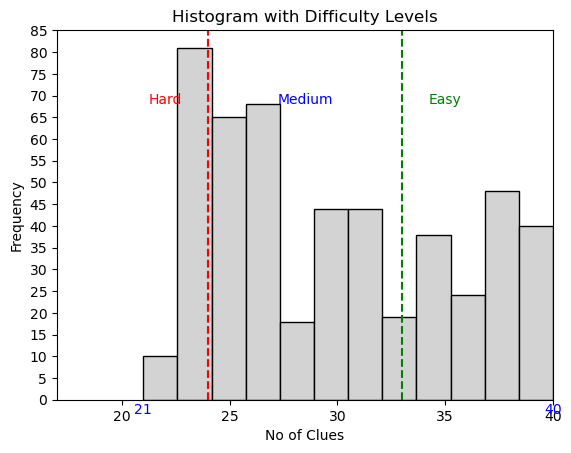

In [62]:
# prepare no of clues
clues_num = []
for i in range(1, len(sudoku_output)):
    clues_num+=[sum(1 for char in sudoku_output[i][1] if char!='0')]
    
# plot the distribution of difficulty levels
plt.hist(clues_num, bins=12, color='lightgray', edgecolor='black')

# setting x-axis limits
plt.xlim(17, 40)

# setting y-axis ticks
plt.yticks(np.arange(0, max(plt.gca().get_ylim()) + 1, step=5))

# adding vertical lines
plt.axvline(x=24, color='red', linestyle='--', label='24')
plt.axvline(x=33, color='green', linestyle='--', label='33')

# adding text labels
plt.text(22, max(plt.gca().get_ylim())*0.8, 'Hard', color='red', horizontalalignment='center')
plt.text(28.5, max(plt.gca().get_ylim())*0.8, 'Medium', color='blue', horizontalalignment='center')
plt.text(35, max(plt.gca().get_ylim())*0.8, 'Easy', color='green', horizontalalignment='center')

# adding labels and title
plt.xlabel('No of Clues')
plt.ylabel('Frequency')
plt.title('Histogram with Difficulty Levels')

# mark the min and max values on the x-axis
plt.text(min(clues_num), -0.65,f'{min(clues_num)}', color='blue', verticalalignment='top', horizontalalignment='center')
plt.text(max(clues_num), -0.65,f'{max(clues_num)}', color='blue', verticalalignment='top', horizontalalignment='center')

# save the plot
plt.savefig('clues_hist.png')

# showing the plot
plt.show()


We can see the lowest number of clues and thus the most difficult problems contain 21 clues. The reason why there is no puzzle with less clues even though the code allows it is because it is fairly difficult (though as mentioned not impossible) to find such problem with a unique solution. This also explains the spike in the distribution at around 23 clues. Basically even when the set number of minimum clues is really low, say 17, the function finds a problem with single solution after adding even 6 more clues.

The most populous category is Medium. This is not surprising since the range for this category is the broadest. The Easy category is also quite populous and the maximum number of clues in our sample is 40.


Let's also export our data into a `.csv` file and save it.

In [57]:
# export data into a .csv file
# extract the title (first row)
header = ','.join(sudoku_output[0, :])

# save the data to a .csv file
np.savetxt('sudoku_puzzles.csv', sudoku_output[1:], delimiter=',', header=header, comments='', fmt='%s')


## Example

Finally, let's show an example usage of our project. Say I have a sudoku puzzle A. 

In [36]:
# define puzzle A
puzzle_A = '250031040040000006000080000000500000007000900300042060500600000000800010003015007'

# display the puzzle
display_sudoku(puzzle_A)

2 5 0 | 0 3 1 | 0 4 0
0 4 0 | 0 0 0 | 0 0 6
0 0 0 | 0 8 0 | 0 0 0
---------------------
0 0 0 | 5 0 0 | 0 0 0
0 0 7 | 0 0 0 | 9 0 0
3 0 0 | 0 4 2 | 0 6 0
---------------------
5 0 0 | 6 0 0 | 0 0 0
0 0 0 | 8 0 0 | 0 1 0
0 0 3 | 0 1 5 | 0 0 7


I feel that I might be able to solve it but I am stuck and need a push, a hint per say. Hence I input puzzle A in my solving function with coordinates of the cell I want to reveal. Let's say the cell I want to reveal is `E1`.

In [37]:
# get a hint and save it
puzzle_A=solve_sudoku(puzzle_A,coords=['E1'])

# visualize the hint
display_sudoku(puzzle_A)

2 5 0 | 0 3 1 | 0 4 0
0 4 0 | 0 0 0 | 0 0 6
0 0 0 | 0 8 0 | 0 0 0
---------------------
0 0 0 | 5 0 0 | 0 0 0
4 0 7 | 0 0 0 | 9 0 0
3 0 0 | 0 4 2 | 0 6 0
---------------------
5 0 0 | 6 0 0 | 0 0 0
0 0 0 | 8 0 0 | 0 1 0
0 0 3 | 0 1 5 | 0 0 7


Hmm, this wasn't as useful as I hoped it would be. Let's reveal two more cells, `D5` and `G7`.

In [38]:
# get a hint and save it
puzzle_A=solve_sudoku(puzzle_A,coords=['D5', 'G7'])

# visualize the hint
display_sudoku(puzzle_A)

2 5 0 | 0 3 1 | 0 4 0
0 4 0 | 0 0 0 | 0 0 6
0 0 0 | 0 8 0 | 0 0 0
---------------------
0 0 0 | 5 9 0 | 0 0 0
4 0 7 | 0 0 0 | 9 0 0
3 0 0 | 0 4 2 | 0 6 0
---------------------
5 0 0 | 6 0 0 | 2 0 0
0 0 0 | 8 0 0 | 0 1 0
0 0 3 | 0 1 5 | 0 0 7


Well this is nice but I just can't figure it out. I don't want to stay stuck with one problem. Let me see the solution.

In [39]:
# solve the puzzle
puzzle_A=solve_sudoku(puzzle_A)

# visualize the solution
display_sudoku(puzzle_A)

2 5 6 | 7 3 1 | 8 4 9
1 4 8 | 2 5 9 | 3 7 6
7 3 9 | 4 8 6 | 5 2 1
---------------------
8 6 2 | 5 9 7 | 1 3 4
4 1 7 | 3 6 8 | 9 5 2
3 9 5 | 1 4 2 | 7 6 8
---------------------
5 8 1 | 6 7 4 | 2 9 3
9 7 4 | 8 2 3 | 6 1 5
6 2 3 | 9 1 5 | 4 8 7


Oh I would never get that. Bless this sudoku solver! 😀